# Regresión lineal de la calidad del aire (Monóxido de Carbono) en Salinas, EE. UU. (2022–2023)

## Primer de regresión lineal

En este análisis se aplica un modelo de regresión lineal para estudiar la tendencia del indicador de calidad del aire, específicamente el monóxido de carbono (CO), registrado diariamente en la estación de Salinas durante los años 2022 y 2023.

El objetivo es identificar la relación entre el tiempo y la concentración máxima diaria de CO en 8 horas, así como evaluar el desempeño del modelo mediante métricas estadísticas. Este enfoque permite explorar patrones de contaminación atmosférica y comprender cómo ha variado el contaminante a lo largo del periodo analizado.

### Importando paquetes y el conjunto de datos

In [25]:
import os, glob
import pandas as pd

print("cwd:", os.getcwd())
csvs = glob.glob("*.csv")
if not csvs:
    raise FileNotFoundError("No hay archivos .csv en el directorio actual.")
candidates = [f for f in csvs if any(k in f.lower() for k in ("co","air","ad_viz","plotval","salinas"))]
filepath = candidates[0] if candidates else csvs[0]
try:
    df = pd.read_csv(filepath, encoding="utf-8")
except Exception:
    df = pd.read_csv(filepath, encoding="latin1")
df.columns = [c.strip().replace(' ', '_').replace('-', '_').replace('(', '').replace(')', '') for c in df.columns]
print("Archivo cargado:", filepath)
print(df.shape)
print(df.columns.tolist())
print(df.head().to_string(index=False))





cwd: c:\Users\Ibet Huamani\Downloads\PROYECTOS 1
Archivo cargado: ad_viz_plotval_data.csv
(366, 21)
['Date', 'Source', 'Site_ID', 'POC', 'Daily_Max_8_hour_CO_Concentration', 'Units', 'Daily_AQI_Value', 'Local_Site_Name', 'Daily_Obs_Count', 'Percent_Complete', 'AQS_Parameter_Code', 'AQS_Parameter_Description', 'Method_Code', 'CBSA_Code', 'CBSA_Name', 'State_FIPS_Code', 'State', 'County_FIPS_Code', 'County', 'Site_Latitude', 'Site_Longitude']
      Date Source  Site_ID  POC  Daily_Max_8_hour_CO_Concentration Units  Daily_AQI_Value Local_Site_Name  Daily_Obs_Count  Percent_Complete  AQS_Parameter_Code AQS_Parameter_Description  Method_Code  CBSA_Code   CBSA_Name  State_FIPS_Code      State  County_FIPS_Code   County  Site_Latitude  Site_Longitude
01/01/2024    AQS 60531003    1                                0.6   ppm                7       Salinas 3               19              79.0               42101           Carbon monoxide           54      41500 Salinas, CA                6 Califo

In [38]:
#df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/USA_Housing.csv")
df = pd.read_csv("ad_viz_plotval_data.csv")

df.head()  # vemos los 5 primeros datos del dataframe

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2024,AQS,60531003,1,0.6,ppm,7,Salinas 3,19,79.0,...,Carbon monoxide,54,41500,"Salinas, CA",6,California,53,Monterey,36.694261,-121.623271
1,01/02/2024,AQS,60531003,1,0.4,ppm,5,Salinas 3,24,100.0,...,Carbon monoxide,54,41500,"Salinas, CA",6,California,53,Monterey,36.694261,-121.623271
2,01/03/2024,AQS,60531003,1,0.4,ppm,5,Salinas 3,24,100.0,...,Carbon monoxide,54,41500,"Salinas, CA",6,California,53,Monterey,36.694261,-121.623271
3,01/04/2024,AQS,60531003,1,0.4,ppm,5,Salinas 3,24,100.0,...,Carbon monoxide,54,41500,"Salinas, CA",6,California,53,Monterey,36.694261,-121.623271
4,01/05/2024,AQS,60531003,1,0.4,ppm,5,Salinas 3,24,100.0,...,Carbon monoxide,54,41500,"Salinas, CA",6,California,53,Monterey,36.694261,-121.623271


label_encoders = {}
le = LabelEncoder()
df['Medical Condition'] = le.fit_transform(df['Medical Condition'].astype(str))
label_encoders['Medical Condition'] = le

### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [27]:
# Consultar información básica del dataset
df.info(verbose=True)

# También puedes complementar con:
print("\nDimensiones del dataset:", df.shape)
print("\nColumnas del dataset:", df.columns.tolist())
print("\nValores nulos por columna:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               366 non-null    object 
 1   Source                             366 non-null    object 
 2   Site ID                            366 non-null    int64  
 3   POC                                366 non-null    int64  
 4   Daily Max 8-hour CO Concentration  366 non-null    float64
 5   Units                              366 non-null    object 
 6   Daily AQI Value                    366 non-null    int64  
 7   Local Site Name                    366 non-null    object 
 8   Daily Obs Count                    366 non-null    int64  
 9   Percent Complete                   366 non-null    float64
 10  AQS Parameter Code                 366 non-null    int64  
 11  AQS Parameter Description          366 non-null    object 

**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [137]:
df.describe()

,Site ID,POC,Daily Max 8-hour CO Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude,year,month
count,366.0,366.0,366.000000,366.000000,366.000000,366.000000,366.0,366.0,366.0,366.0,366.0,366.000000,366.000000,366.0,366.000000
mean,60531003.0,1.0,0.302459,3.297814,23.893443,99.557377,42101.0,54.0,41500.0,6.0,53.0,36.694261,-121.623271,2024.0,6.513661
std,0.0,0.0,0.108638,1.482813,0.815676,3.385017,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,3.455958
min,60531003.0,1.0,0.100000,1.000000,15.000000,63.000000,42101.0,54.0,41500.0,6.0,53.0,36.694261,-121.623271,2024.0,1.000000
25%,60531003.0,1.0,0.200000,2.000000,24.000000,100.000000,42101.0,54.0,41500.0,6.0,53.0,36.694261,-121.623271,2024.0,4.000000
50%,60531003.0,1.0,0.300000,3.000000,24.000000,100.000000,42101.0,54.0,41500.0,6.0,53.0,36.694261,-121.623271,2024.0,7.000000
75%,60531003.0,1.0,0.400000,5.000000,24.000000,100.000000,42101.0,54.0,41500.0,6.0,53.0,36.694261,-121.623271,2024.0,9.750000
max,60531003.0,1.0,0.600000,7.000000,24.000000,100.000000,42101.0,54.0,41500.0,6.0,53.0,36.694261,-121.623271,2024.0,12.000000


**El método 'columns' obtiene los nombres de las columnas (características)**

In [138]:

df.columns

Index(['Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude', 'year',
       'month'],
      dtype='object')

### Visualización básica del conjunto de datos

**Pairplots usando seaborn**

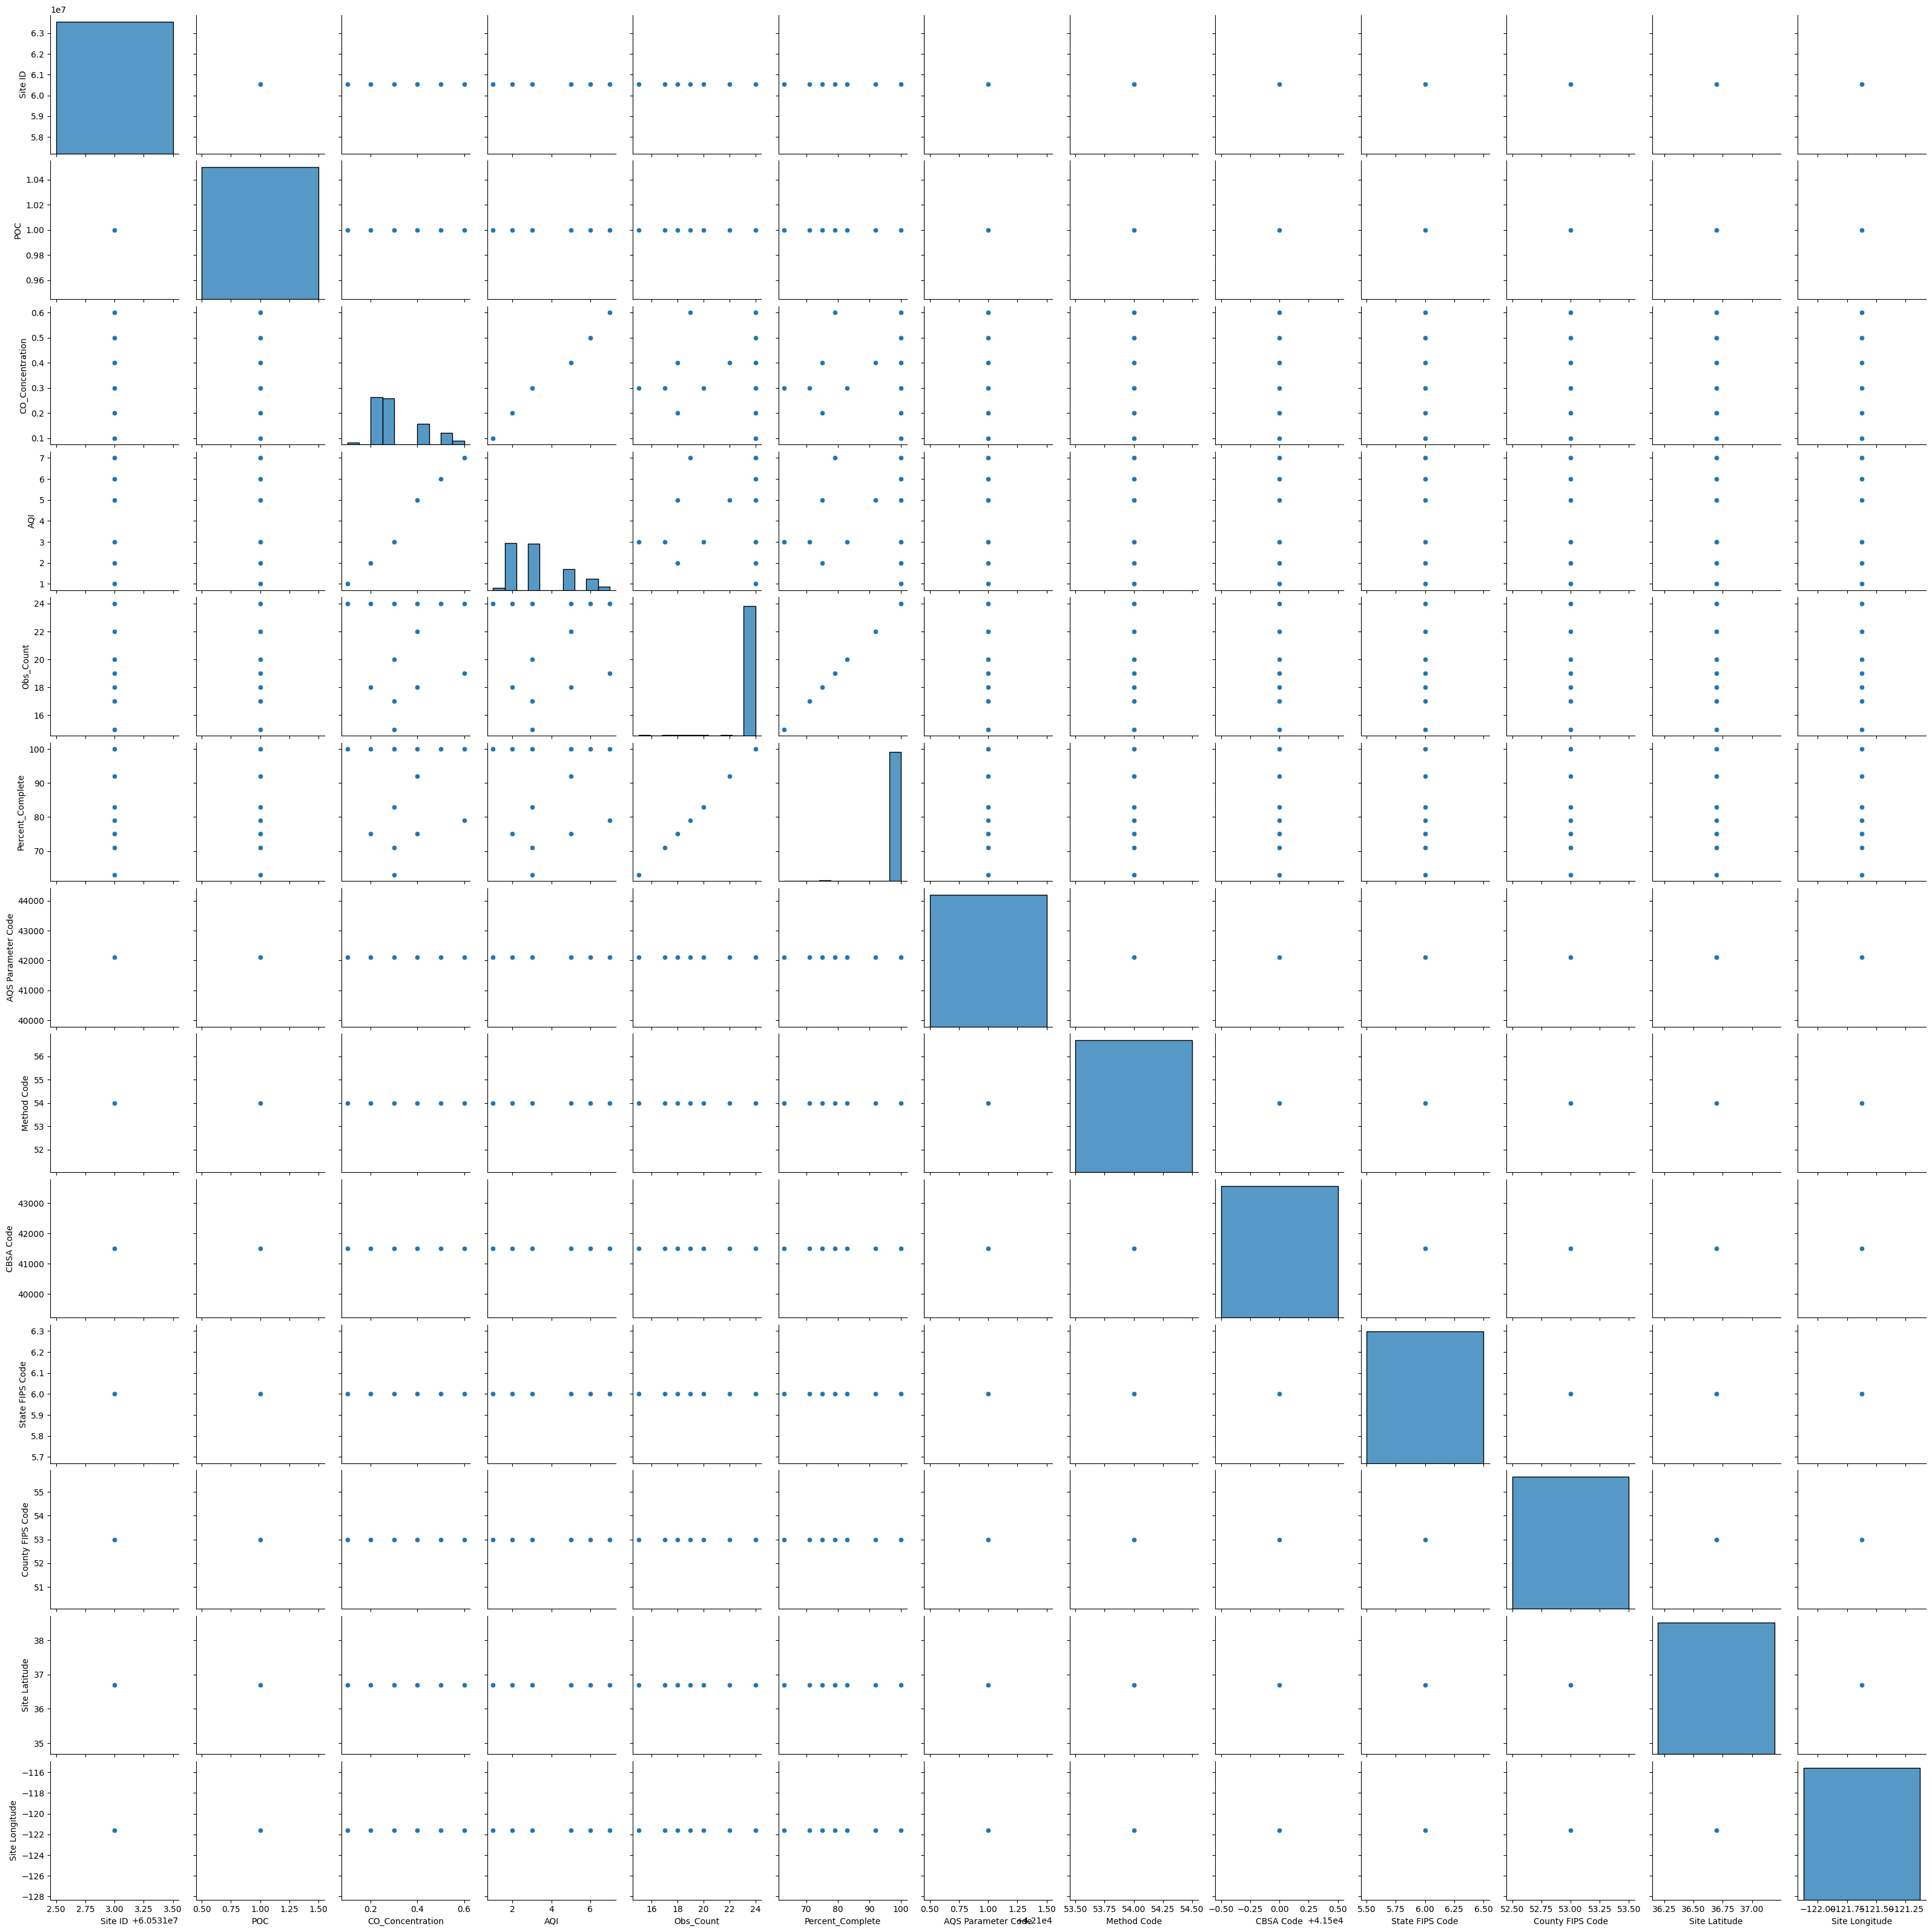

In [139]:
df = df.rename(columns={
    "Daily Max 8-hour CO Concentration": "CO_Concentration",
    "Daily AQI Value": "AQI",
    "Daily Obs Count": "Obs_Count",
    "Percent Complete": "Percent_Complete"})

sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()


**Distribución de la concentración de CO (ppm) — cantidad registrada**

<Axes: ylabel='Frequency'>

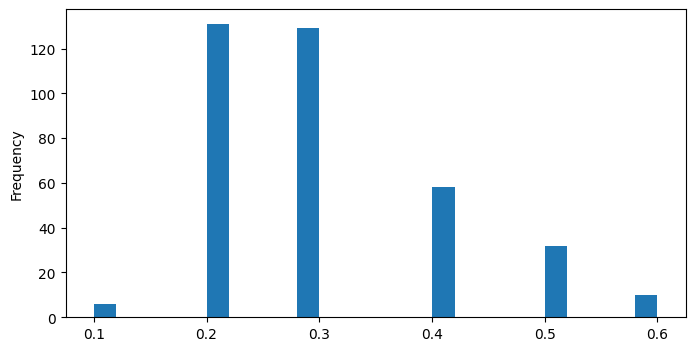

In [40]:
df['Daily Max 8-hour CO Concentration'].plot.hist(bins=25,figsize=(8,4))




<Axes: ylabel='Density'>

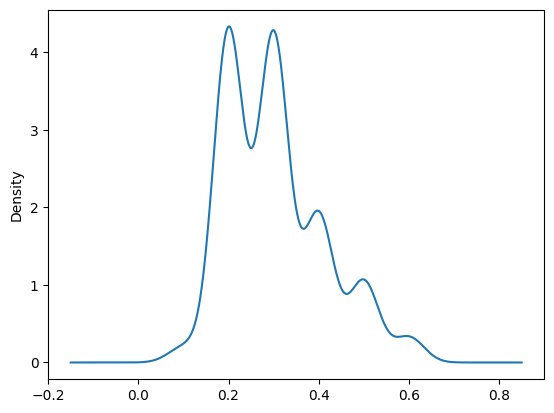

In [42]:
df['Daily Max 8-hour CO Concentration'].plot.density()

**Matriz de correlación y heatmap**

In [43]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Site ID,POC,Daily Max 8-hour CO Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude
Site ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daily Max 8-hour CO Concentration,NaN,NaN,1.000000,0.986978,-0.049595,-0.049928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daily AQI Value,NaN,NaN,0.986978,1.000000,-0.041646,-0.041895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daily Obs Count,NaN,NaN,-0.049595,-0.041646,1.000000,0.999945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percent Complete,NaN,NaN,-0.049928,-0.041895,0.999945,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQS Parameter Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Method Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBSA Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State FIPS Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

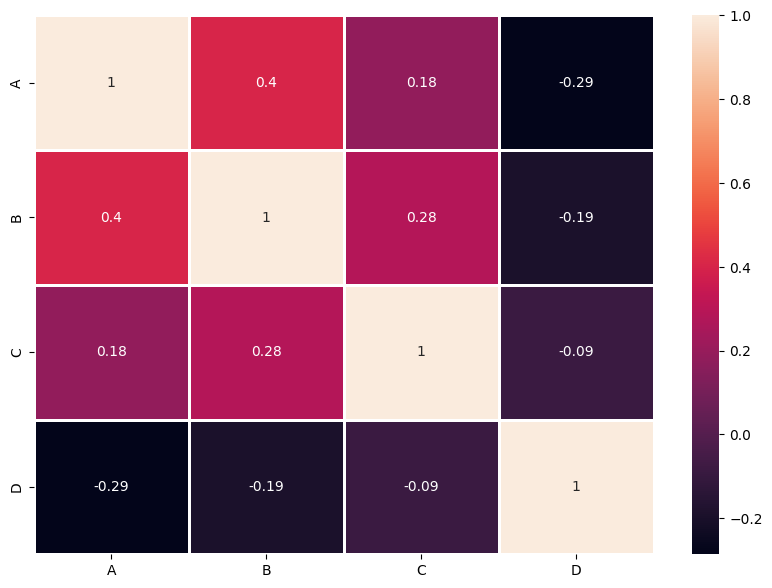

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)



### Conjuntos de características y variables

**Haga una lista de los nombres de las columnas del dataframe**

In [46]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Max 8-hour CO Concentration',
 'Units',
 'Daily AQI Value',
 'Local Site Name',
 'Daily Obs Count',
 'Percent Complete',
 'AQS Parameter Code',
 'AQS Parameter Description',
 'Method Code',
 'CBSA Code',
 'CBSA Name',
 'State FIPS Code',
 'State',
 'County FIPS Code',
 'County',
 'Site Latitude',
 'Site Longitude']

In [65]:
#Asignatura
df['Date'] = pd.to_datetime(df['Date'])

In [66]:
# Crear nuevas columnas numéricas
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month

# Luego eliminas la original
df = df.drop(columns=["Date"])

In [72]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Source                             366 non-null    object 
 1   Site ID                            366 non-null    int64  
 2   POC                                366 non-null    int64  
 3   Daily Max 8-hour CO Concentration  366 non-null    float64
 4   Units                              366 non-null    object 
 5   Daily AQI Value                    366 non-null    int64  
 6   Local Site Name                    366 non-null    object 
 7   Daily Obs Count                    366 non-null    int64  
 8   Percent Complete                   366 non-null    float64
 9   AQS Parameter Code                 366 non-null    int64  
 10  AQS Parameter Description          366 non-null    object 
 11  Method Code                        366 non-null    int64  

**Coloque todas las características numéricas en X y el precio en y, ignore la dirección, que es una cadena para la regresión lineal**

In [98]:
# Definir Y (columna 3)
y = df.iloc[:, 3]   # 'Daily Mean PM2.10 Concentration'

# Definir X quitando la columna 3 y también las categóricas (object)
X = df.drop(columns=["Daily Max 8-hour CO Concentration",
                     "Source", "Units", "Local Site Name",
                     "AQS Parameter Description", 
                     "CBSA Name", "State", "County"])

In [99]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (366, 14)
Tamaño de Variable Objetivo: (366,)


In [81]:
X.head()

,Site ID,POC,Daily AQI Value,Daily Obs Count,Percent Complete,AQS Parameter Code,Method Code,CBSA Code,State FIPS Code,County FIPS Code,Site Latitude,Site Longitude,year,month
0,60531003,1,7,19,79.0,42101,54,41500,6,53,36.694261,-121.623271,2024,1
1,60531003,1,5,24,100.0,42101,54,41500,6,53,36.694261,-121.623271,2024,1
2,60531003,1,5,24,100.0,42101,54,41500,6,53,36.694261,-121.623271,2024,1
3,60531003,1,5,24,100.0,42101,54,41500,6,53,36.694261,-121.623271,2024,1
4,60531003,1,5,24,100.0,42101,54,41500,6,53,36.694261,-121.623271,2024,1


In [100]:
y.head()

0    0.6
1    0.4
2    0.4
3    0.4
4    0.4
Name: Daily Max 8-hour CO Concentration, dtype: float64

### División de entrenamiento-prueba

**Importamos la función train_test_split de scikit-learn**

In [85]:
from sklearn.model_selection import train_test_split


**Creamos los conjuntos de entrenamiento X y de prueba y en un comando usando una proporción de división y una semilla aleatoria**

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


**Verifique el tamaño y la forma de las divisiones de entrenamiento/prueba (debe estar en la proporción según el parámetro test_size anterior)**

In [87]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (256, 14)
Tamaño del conjunto de características de prueba: (110, 14)
Tamaño de la variable objetivo del entrenamiento: (256,)
Tamaño de la variable objetivo de prueba: (110,)


### Ajuste y entrenamiento del modelo

**Importamos el estimador de modelo de regresión lineal de scikit-learn e lo instanciamos**

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [102]:
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

**Ajustamos el modelo al propio objeto instanciado**

In [103]:
lm.fit(X_train,y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [104]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: 0.07890021255326046


In [105]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [ 0.00000000e+00 -4.02455846e-16  7.22309833e-02  2.68756325e-01
 -6.46358096e-02  0.00000000e+00  6.50202487e-43 -4.07831529e-56
  0.00000000e+00  1.49352367e-59 -5.63793959e-27  2.25387421e-26
  0.00000000e+00 -1.90592024e-04]


In [106]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Site ID,0.000000e+00
POC,-4.024558e-16
Daily AQI Value,7.223098e-02
Daily Obs Count,2.687563e-01
Percent Complete,-6.463581e-02
AQS Parameter Code,0.000000e+00
Method Code,6.502025e-43
CBSA Code,-4.078315e-56
State FIPS Code,0.000000e+00
County FIPS Code,1.493524e-59


### Cálculo de errores estándar y estadística t para los coeficientes

In [107]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0] * len(X_train.columns)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

C:\Users\Ibet Huamani\AppData\Local\Temp\ipykernel_332\3536349415.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))


,Coefficients,Standard Error,t-statistic
Site ID,0.000000e+00,inf,0.000000e+00
POC,-4.024558e-16,inf,-0.000000e+00
Daily AQI Value,7.223098e-02,7.580551e-04,9.528461e+01
Daily Obs Count,2.687563e-01,1.446912e-03,1.857447e+02
Percent Complete,-6.463581e-02,3.477953e-04,-1.858444e+02
AQS Parameter Code,0.000000e+00,inf,0.000000e+00
Method Code,6.502025e-43,inf,0.000000e+00
CBSA Code,-4.078315e-56,inf,-0.000000e+00
State FIPS Code,0.000000e+00,inf,0.000000e+00
County FIPS Code,1.493524e-59,inf,0.000000e+00


In [108]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda
------------------------------------------------------------------------------------------
Daily Obs Count > 
Daily AQI Value > 
Site Longitude > 
POC > 
AQS Parameter Code > 
Site ID > 
County FIPS Code > 
Method Code > 
State FIPS Code > 
CBSA Code > 
year > 
Site Latitude > 
month > 
Percent Complete


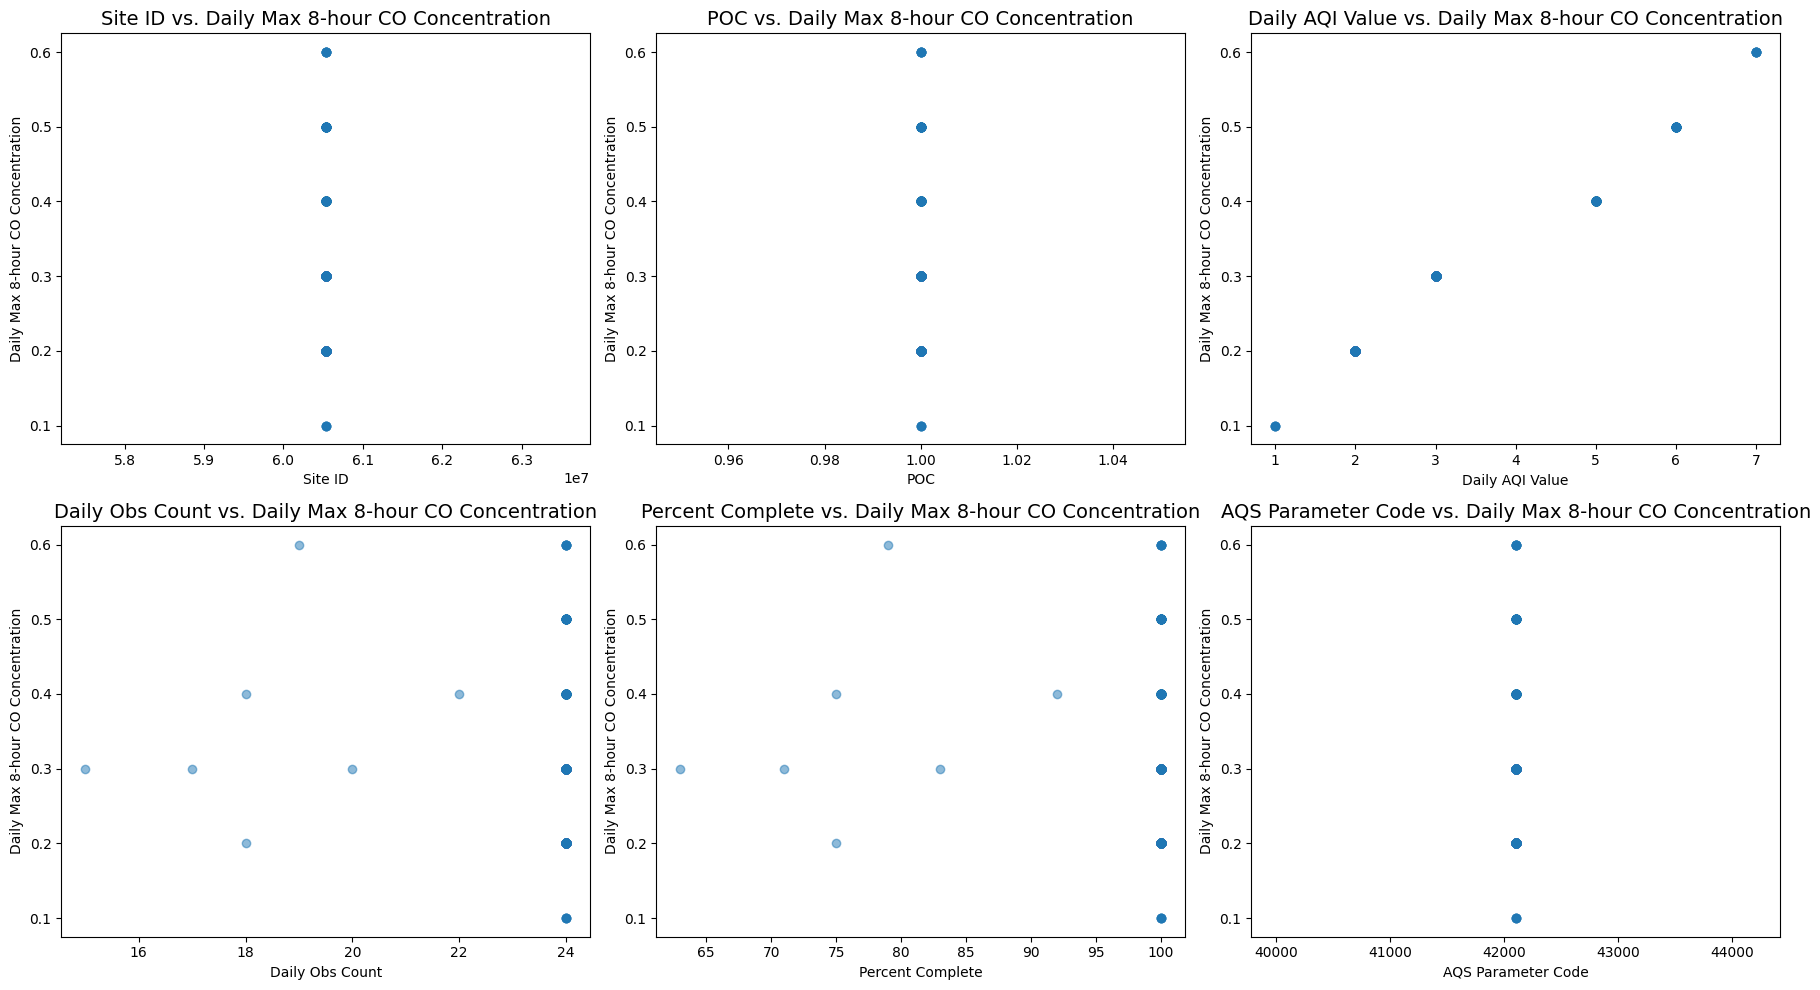

In [110]:
# Lista de columnas (ej: las más importantes del modelo)
l = list(cdf.index)   # asumiendo que cdf tiene tus coeficientes / features ordenadas

# Cuántas variables quieres graficar (ej: 6 primeras)
n = 6
cols_to_plot = l[:n]

# Definir el grid: 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # para iterar fácilmente

# Hacer scatter plot para cada columna contra "Billing Amount"
for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df["Daily Max 8-hour CO Concentration"], alpha=0.5)
    axes[i].set_title(f"{col} vs. Daily Max 8-hour CO Concentration", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Daily Max 8-hour CO Concentration")

plt.tight_layout()
plt.show()











**R cuadrado del ajuste del modelo**

In [111]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 0.974


### Matrices de evaluación de predicción, estimación de error y regresión

**Predicción usando el modelo lm**

In [112]:
predictions = lm.predict(X_test)
print ("Tipo del objeto predicho :", type(predictions))
print ("Tamaño del objeto predicho:", predictions.shape)



Tipo del objeto predicho : <class 'numpy.ndarray'>
Tamaño del objeto predicho: (110,)


**Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados**

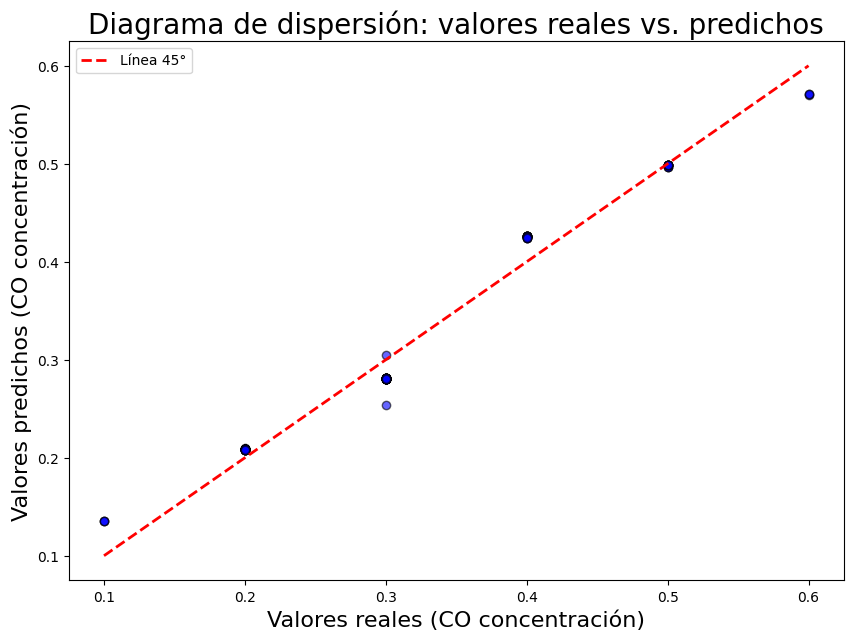

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Diagrama de dispersión: valores reales vs. predichos", fontsize=20)
plt.xlabel("Valores reales (CO concentración)", fontsize=16)
plt.ylabel("Valores predichos (CO concentración)", fontsize=16)

# Gráfico de dispersión
plt.scatter(y_test, predictions, alpha=0.6, color="blue", edgecolor="k")

# Línea de 45 grados
min_val = min(min(y_test), min(predictions))
max_val = max(max(y_test), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", linewidth=2, label="Línea 45°")

plt.legend()
plt.show()


**Visualizamos el histograma de los residuos, es decir, errores predichos (se espera un patrón distribuido normalmente)**

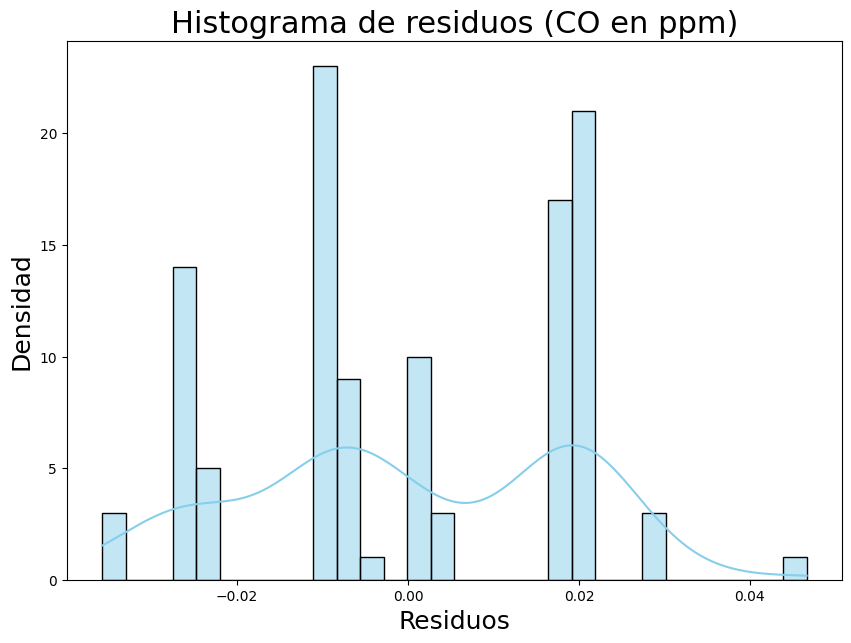

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular los residuos
residuos = y_test - predictions

plt.figure(figsize=(10,7))
plt.title("Histograma de residuos (CO en ppm)", fontsize=22)
plt.xlabel("Residuos", fontsize=18)
plt.ylabel("Densidad", fontsize=18)

# Usamos histplot en vez de distplot
sns.histplot(residuos, kde=True, bins=30, color="skyblue")

plt.show()


**Diagrama de dispersión de residuos y valores predichos (Homoscedasticidad)**


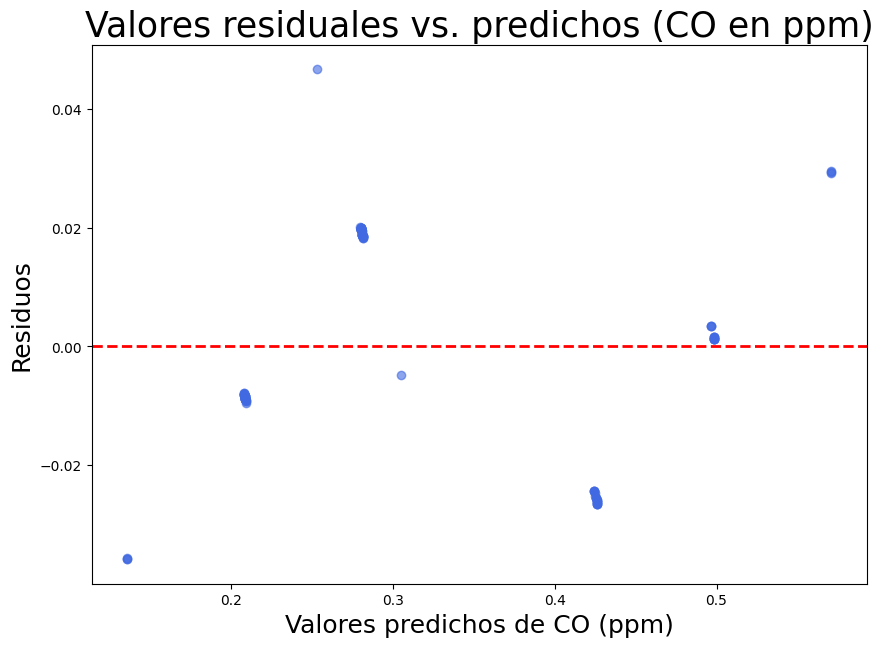

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Valores residuales vs. predichos (CO en ppm)", fontsize=25)
plt.xlabel("Valores predichos de CO (ppm)", fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=predictions, y=y_test - predictions, alpha=0.6, color="royalblue")

plt.axhline(y=0, color="red", linestyle="--", linewidth=2)  # línea de referencia
plt.show()


**Métricas de evaluación de la regresión**

In [133]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))


Mean absolute error (MAE): 0.01601425018488875
Mean square error (MSE): 0.0003412086400753536
Root mean square error (RMSE): 0.018471833695530977


**Valor R cuadrado**

In [135]:
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))



Valor R-squared de las predicciones: 0.973
